In [17]:
# Library Imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [18]:
# explore wetather data
df = pd.read_csv('data/weather_data_ny.csv')

In [19]:
df.sample(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,SNOW,...,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08
1494,USC00305816,"WORLD TRADE CENTER, NY US",40.71042,-74.01426,25.3,2022-08-16,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2023-08-25,1.34,NaN,0.44,0.0,...,200.0,100.0,8.9,28.0,1.0,NaN,NaN,NaN,NaN,1.0
926,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2024-07-15,2.46,NaN,0.12,0.0,...,260.0,230.0,10.1,21.9,1.0,NaN,1.0,NaN,NaN,1.0
767,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2024-02-07,4.25,NaN,0.00,0.0,...,60.0,50.0,8.9,14.1,NaN,NaN,NaN,NaN,NaN,NaN
541,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2023-06-26,4.03,NaN,0.51,0.0,...,300.0,320.0,14.1,21.0,1.0,NaN,1.0,NaN,NaN,1.0


In [20]:
# see unuqie values for name
print(df['NAME'].unique())

# Count unique values for df['NAME']
print(df['NAME'].value_counts())

# Check for duplicates in date
print(df['DATE'].duplicated().sum())




['NY CITY CENTRAL PARK, NY US' 'WORLD TRADE CENTER, NY US']
NAME
NY CITY CENTRAL PARK, NY US    1020
WORLD TRADE CENTER, NY US       954
Name: count, dtype: int64
954


In [21]:
# drop station name keep only central park
df = df[df['NAME'] == 'NY CITY CENTRAL PARK, NY US']
df.shape

(1020, 25)

In [22]:
# drop columns
df = df.drop(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PGTM', 'WDF2', 'WDF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'WSF2', 'WSF5', 'TOBS', 'TAVG', 'SNWD'], axis=1)
df.head()

,NAME,DATE,AWND,PRCP,SNOW,TMAX,TMIN
0,"NY CITY CENTRAL PARK, NY US",2022-01-01,3.13,0.79,0.0,56.0,50.0
1,"NY CITY CENTRAL PARK, NY US",2022-01-02,5.82,0.04,0.0,59.0,37.0
2,"NY CITY CENTRAL PARK, NY US",2022-01-03,9.84,0.00,0.0,37.0,22.0
3,"NY CITY CENTRAL PARK, NY US",2022-01-04,6.04,0.00,0.0,34.0,19.0
4,"NY CITY CENTRAL PARK, NY US",2022-01-05,5.59,0.23,0.0,47.0,31.0


In [23]:
# Get the Avg value from tmax and tmin
df['TAVG'] = df[['TMAX', 'TMIN']].mean(axis=1)
df.head()

,NAME,DATE,AWND,PRCP,SNOW,TMAX,TMIN,TAVG
0,"NY CITY CENTRAL PARK, NY US",2022-01-01,3.13,0.79,0.0,56.0,50.0,53.0
1,"NY CITY CENTRAL PARK, NY US",2022-01-02,5.82,0.04,0.0,59.0,37.0,48.0
2,"NY CITY CENTRAL PARK, NY US",2022-01-03,9.84,0.00,0.0,37.0,22.0,29.5
3,"NY CITY CENTRAL PARK, NY US",2022-01-04,6.04,0.00,0.0,34.0,19.0,26.5
4,"NY CITY CENTRAL PARK, NY US",2022-01-05,5.59,0.23,0.0,47.0,31.0,39.0


In [24]:
# Reordering columns
df = df[['DATE', 'NAME', 'TMAX', 'TMIN', 'TAVG', 'PRCP', 'AWND', 'SNOW']]

In [25]:
print(df.head())
df.shape

         DATE                         NAME  TMAX  TMIN  TAVG  PRCP  AWND  SNOW
0  2022-01-01  NY CITY CENTRAL PARK, NY US  56.0  50.0  53.0  0.79  3.13   0.0
1  2022-01-02  NY CITY CENTRAL PARK, NY US  59.0  37.0  48.0  0.04  5.82   0.0
2  2022-01-03  NY CITY CENTRAL PARK, NY US  37.0  22.0  29.5  0.00  9.84   0.0
3  2022-01-04  NY CITY CENTRAL PARK, NY US  34.0  19.0  26.5  0.00  6.04   0.0
4  2022-01-05  NY CITY CENTRAL PARK, NY US  47.0  31.0  39.0  0.23  5.59   0.0


(1020, 8)

In [26]:
# export to csv file
# df.to_csv('data/Cleaned_data/weather_data_ny_cleaned.csv', index=False)

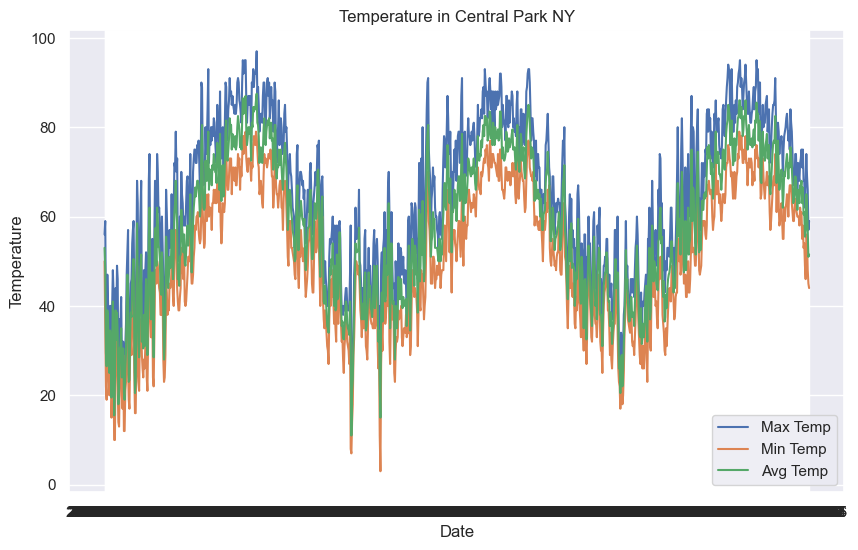

In [28]:
# plot weather data

plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['TMAX'], label='Max Temp')
plt.plot(df['DATE'], df['TMIN'], label='Min Temp')
plt.plot(df['DATE'], df['TAVG'], label='Avg Temp')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature in Central Park NY')
plt.legend()

plt.show()

